# Exploring the Zillow Data
- [ ] explore drivers of log error
- [ ] create clusters for additional features
- [ ] explore clusters created

In [1]:
import Prepare

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train, validate, test = Prepare.prepare_zillow()

train shape:  (44284, 24) , validate shape:  (12491, 24) , test shape:  (6309, 24)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


In [3]:
# to use split data while exploring in Tableau
# train.to_csv('zillow_train.csv')

In [4]:
train

,parcel_id,log_error,tax_value,structure_tax_value,land_tax_value,tax_amount,tax_rate,county_id,zip_code,latitude,...,full_bathrooms,bed_plus_bath,room_count,property_sqft,lot_sqft,land_use_type,year_built,property_age,transaction_date,transaction_month
35177,12881510,-0.080165,114424.0,52011.0,62413.0,1624.52,1.419737,6037,96507,34061381.0,...,1,4,0,1198.0,4384.0,261,1920.0,100.0,2017-05-23,5
35637,13011235,-0.021597,384934.0,123859.0,261075.0,4930.30,1.280817,6037,96510,34072891.0,...,2,5,0,1176.0,6055.0,261,1948.0,72.0,2017-05-25,5
51671,14383819,0.030354,228441.0,67437.0,161004.0,2372.52,1.038570,6059,96974,33601109.0,...,2,5,6,1240.0,2351.0,261,1971.0,49.0,2017-07-14,7
7403,12671725,-0.034023,555000.0,185000.0,370000.0,6317.81,1.138344,6037,96161,33838000.0,...,2,5,0,1399.0,139956.0,266,1989.0,31.0,2017-02-08,2
64398,14177524,-0.014118,252042.0,71195.0,180847.0,3291.68,1.306005,6059,97068,33875865.0,...,2,5,6,1477.0,7260.0,261,1955.0,65.0,2017-08-29,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59414,12098710,0.051275,255815.0,68380.0,187435.0,3096.76,1.210547,6037,96023,34122554.0,...,1,4,0,1296.0,5534.0,261,1905.0,115.0,2017-08-11,8
7202,12610149,-0.062435,166053.0,111607.0,54446.0,2107.26,1.269029,6037,96159,33808820.0,...,3,6,0,2164.0,10180.0,261,1974.0,46.0,2017-02-07,2
59195,12036360,-0.161191,912709.0,206095.0,706614.0,9264.17,1.015019,6037,96008,34105157.0,...,1,4,0,1350.0,5554.0,261,1922.0,98.0,2017-08-10,8
5333,12071950,-0.024243,154774.0,112761.0,42013.0,1761.06,1.137827,6037,96326,34169442.0,...,2,6,0,2267.0,8993.0,261,1966.0,54.0,2017-01-27,1


In [5]:
train.columns

Index(['parcel_id', 'log_error', 'tax_value', 'structure_tax_value',
       'land_tax_value', 'tax_amount', 'tax_rate', 'county_id', 'zip_code',
       'latitude', 'longitude', 'census_id', 'bathrooms', 'bedrooms',
       'full_bathrooms', 'bed_plus_bath', 'room_count', 'property_sqft',
       'lot_sqft', 'land_use_type', 'year_built', 'property_age',
       'transaction_date', 'transaction_month'],
      dtype='object')

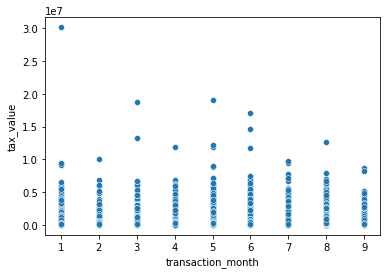

In [7]:
sns.scatterplot(x=train.transaction_month, y=train.tax_value)

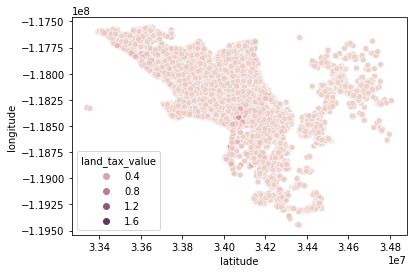

In [8]:
sns.scatterplot(x=train.latitude , y=train.longitude, hue=train.land_tax_value)

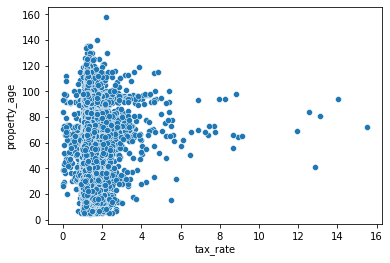

In [9]:
sns.scatterplot(x=train.tax_rate , y=train.property_age)

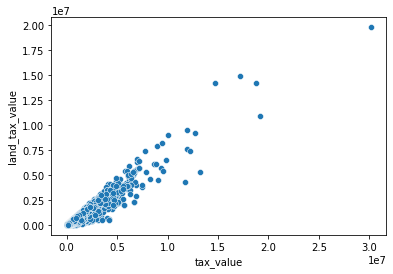

In [10]:
sns.scatterplot(x=train.tax_value , y=train.land_tax_value)

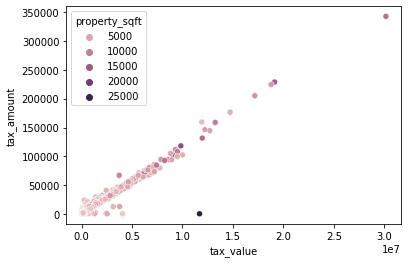

In [11]:
sns.scatterplot(x=train.tax_value, y=train.tax_amount, hue=train.property_sqft)

## Scaling the Data with Prepare Function

In [12]:
train_scaled, validate_scaled, test_scaled = Prepare.scale_data(train, validate, test)

In [13]:
train_scaled

,parcel_id,tax_value,structure_tax_value,land_tax_value,tax_amount,tax_rate,county_id,zip_code,latitude,longitude,...,bedrooms,full_bathrooms,bed_plus_bath,room_count,property_sqft,lot_sqft,land_use_type,year_built,property_age,transaction_month
35177,-0.002074,-0.580964,-0.571306,-0.511610,-0.581882,0.311754,-0.524502,-0.012802,0.158285,1.376589,...,-0.179822,-1.266590,-0.793175,-0.559417,-0.643998,-0.165200,-0.368459,-1.972136,1.972136,-0.016388
35637,0.036391,-0.100243,-0.238973,-0.011933,-0.069632,-0.089362,-0.524502,-0.012069,0.205567,0.465900,...,-0.179822,-0.210864,-0.215718,-0.559417,-0.667632,-0.151184,-0.368459,-0.702169,0.702169,-0.016388
51671,0.443374,-0.378346,-0.499953,-0.263633,-0.465975,-0.788823,0.532610,0.101177,-1.732448,1.448729,...,-0.179822,-0.210864,-0.215718,1.410541,-0.598878,-0.182253,-0.368459,0.341019,-0.341019,0.833419
7403,-0.064277,0.201980,0.043835,0.262037,0.145371,-0.500736,-0.524502,-0.097248,-0.759333,-0.434800,...,-0.179822,-0.210864,-0.215718,-0.559417,-0.428066,0.971966,2.717646,1.157426,-1.157426,-1.291099
64398,0.382205,-0.336404,-0.482571,-0.213723,-0.323546,-0.016636,0.532610,0.124120,-0.603789,1.005828,...,-0.179822,-0.210864,-0.215718,1.410541,-0.344271,-0.141077,-0.368459,-0.384677,0.384677,1.258323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59414,-0.234180,-0.329699,-0.495592,-0.197153,-0.353750,-0.292260,-0.524502,-0.130930,0.409575,0.137310,...,-0.179822,-1.266590,-0.793175,-0.559417,-0.538718,-0.155554,-0.368459,-2.652476,2.652476,1.258323
7202,-0.082534,-0.489215,-0.295645,-0.531649,-0.507079,-0.123400,-0.524502,-0.097737,-0.879200,-0.267759,...,-0.179822,0.844862,0.361738,-0.559417,0.393766,-0.116584,-0.368459,0.477087,-0.477087,-1.291099
59195,-0.252668,0.837662,0.141410,1.108693,0.601928,-0.856824,-0.524502,-0.134591,0.338111,-0.217954,...,-0.179822,-1.266590,-0.793175,-0.559417,-0.480706,-0.155386,-0.368459,-1.881424,1.881424,1.258323
5333,-0.242115,-0.509259,-0.290307,-0.562920,-0.560725,-0.502230,-0.524502,-0.056978,0.602185,-0.053339,...,0.834992,-0.210864,0.361738,-0.559417,0.504417,-0.126540,-0.368459,0.114239,-0.114239,-1.716003


# Create 3 Clusters for Features

In [14]:
from sklearn.cluster import KMeans

### Tax Value, Tax Amount, and Tax Rate

In [15]:
X = train_scaled[['tax_value', 'tax_amount','tax_rate']]

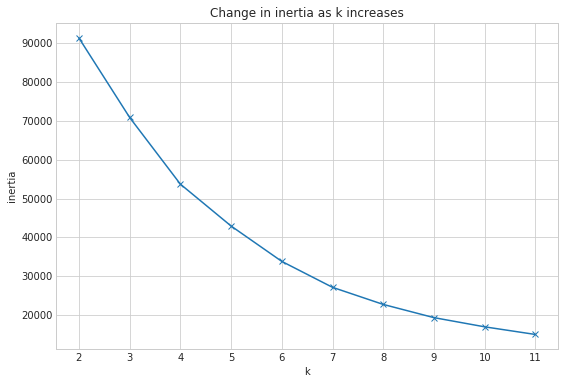

In [16]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
train_scaled['cluster_tax'] = kmeans.predict(X)

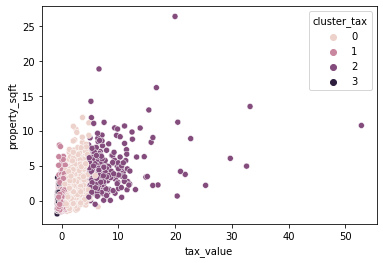

In [19]:
sns.scatterplot(x=train_scaled.tax_value,y=train_scaled.property_sqft, hue=train_scaled.cluster_tax)

### Property and Land SQFT

In [20]:
X = train_scaled[['property_sqft', 'lot_sqft']]

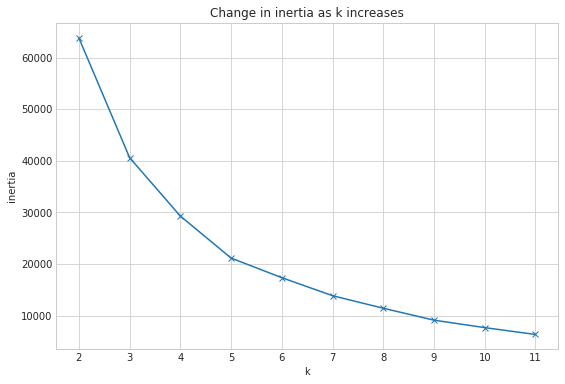

In [21]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [22]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
train_scaled['cluster_sqft'] = kmeans.predict(X)

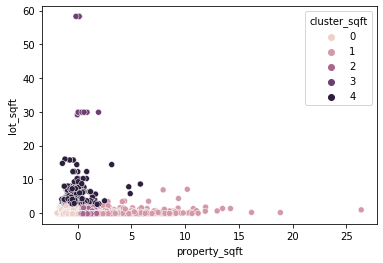

In [24]:
sns.scatterplot(x=train_scaled.property_sqft, y=train_scaled.lot_sqft, hue=train_scaled.cluster_sqft)

## Rooms Cluster - Bed+Bath, Full Bath, Room Count with Age

In [25]:
X = train_scaled[['full_bathrooms', 'bed_plus_bath','room_count','property_age']]

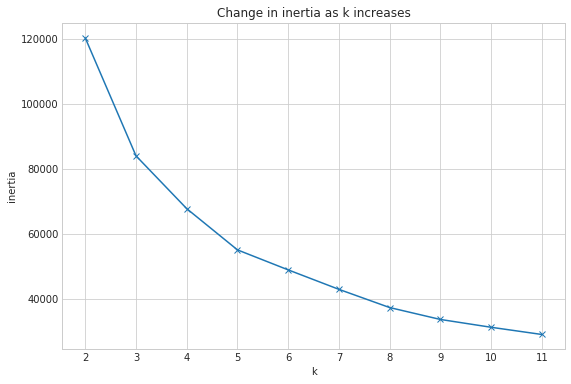

In [26]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
train_scaled['cluster_rooms'] = kmeans.predict(X)

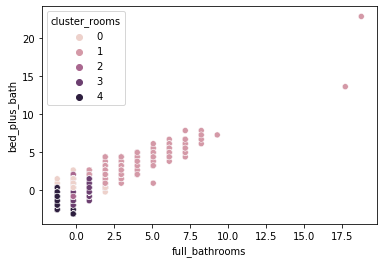

In [29]:
sns.scatterplot(x=train_scaled.full_bathrooms, y=train_scaled.bed_plus_bath, hue=train_scaled.cluster_rooms)

In [30]:
train_scaled.head()

,parcel_id,tax_value,structure_tax_value,land_tax_value,tax_amount,tax_rate,county_id,zip_code,latitude,longitude,...,room_count,property_sqft,lot_sqft,land_use_type,year_built,property_age,transaction_month,cluster_tax,cluster_sqft,cluster_rooms
35177,-0.002074,-0.580964,-0.571306,-0.511610,-0.581882,0.311754,-0.524502,-0.012802,0.158285,1.376589,...,-0.559417,-0.643998,-0.165200,-0.368459,-1.972136,1.972136,-0.016388,1,0,4
35637,0.036391,-0.100243,-0.238973,-0.011933,-0.069632,-0.089362,-0.524502,-0.012069,0.205567,0.465900,...,-0.559417,-0.667632,-0.151184,-0.368459,-0.702169,0.702169,-0.016388,1,0,0
51671,0.443374,-0.378346,-0.499953,-0.263633,-0.465975,-0.788823,0.532610,0.101177,-1.732448,1.448729,...,1.410541,-0.598878,-0.182253,-0.368459,0.341019,-0.341019,0.833419,1,0,2
7403,-0.064277,0.201980,0.043835,0.262037,0.145371,-0.500736,-0.524502,-0.097248,-0.759333,-0.434800,...,-0.559417,-0.428066,0.971966,2.717646,1.157426,-1.157426,-1.291099,1,0,3
64398,0.382205,-0.336404,-0.482571,-0.213723,-0.323546,-0.016636,0.532610,0.124120,-0.603789,1.005828,...,1.410541,-0.344271,-0.141077,-0.368459,-0.384677,0.384677,1.258323,1,0,2


# Explore Clusters

## Cluster with SQFT vs. Log Error

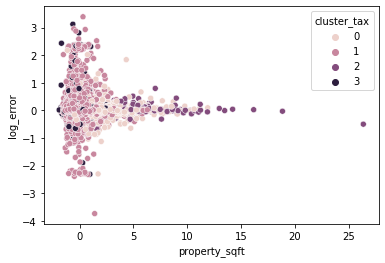

In [31]:
sns.scatterplot(x=train_scaled.property_sqft, y=train.log_error, hue=train_scaled.cluster_tax)

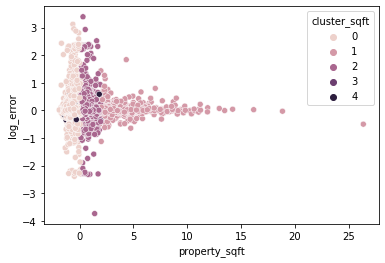

In [32]:
sns.scatterplot(x=train_scaled.property_sqft, y=train.log_error, hue=train_scaled.cluster_sqft)

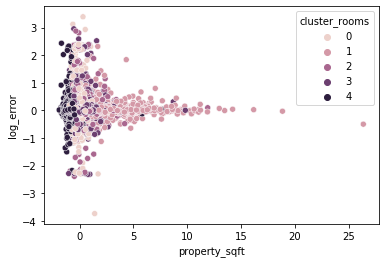

In [33]:
sns.scatterplot(x=train_scaled.property_sqft, y=train.log_error, hue=train_scaled.cluster_rooms)

## Clusters with Transaction vs. Log Error

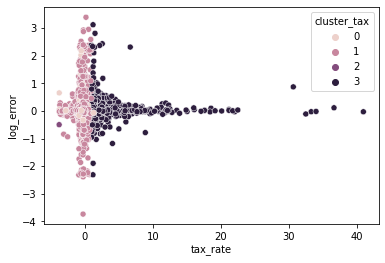

In [34]:
sns.scatterplot(x=train_scaled.tax_rate, y=train.log_error, hue=train_scaled.cluster_tax)